# Ejercicio de programación Regresión Lineal

In [104]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
#Por que tiene muchos archivos lo haremos con pandas es mas comodo
import pandas as pd

# Librerias para graficación (trazado de gráficos)
import matplotlib.pyplot as pyplot

from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `covtype.csv` contiene el dataset para el problema de regresión lineal. Entre sus columnas se incluyen variables ambientales y geográficas como la elevación, la pendiente, la orientación, las distancias a ríos, caminos o puntos de fuego, además de variables binarias de tipo de suelo y área silvestre.

Para este ejercicio se usará Elevation como variable independiente (X) y Cover_Type como variable dependiente (Y). Cover_Type representa el tipo de cobertura forestal en valores del 1 al 7.

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
# Ruta a tu archivo en Drive (ajústala si lo tienes en otra carpeta)
data = '/content/drive/MyDrive/DATA SET IA/kc_house_data.csv'
# Leemos con pandas
df = pd.read_csv(data)

# Seleccionamos X e Y
# variable independiente (metros cuadrados)
X = df['sqft_living'].values
# variable dependiente (precio)
y = df['price'].values


m = y.size  # m = numero de ejemplos de entrenamiento

In [107]:
print(X)

[1180 2570  770 ... 1020 1600 1020]


In [108]:
print(y)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [109]:
print('Cantidad de valores de X: ',X.size)
print('Cantidad de valores de y: ',y.size)

Cantidad de valores de X:  21613
Cantidad de valores de y:  21613


### 1.1 Trazar los datos

In [110]:
def plotData(x, y):
  #graficamos una figura vacia
    fig = pyplot.figure()

    # Tomar muestra de 1000 puntos para no saturar la gráfica
    idx = np.arange(1000)

    pyplot.scatter(x[idx], y[idx], c='skyblue', s=8, edgecolors='k')
    pyplot.ylabel('Precio de la casa (USD)')
    pyplot.xlabel('Metros cuadrados habitables (sqft_living)')
    pyplot.title('Relación entre tamaño y precio (muestra de 1000)')
    pyplot.show()

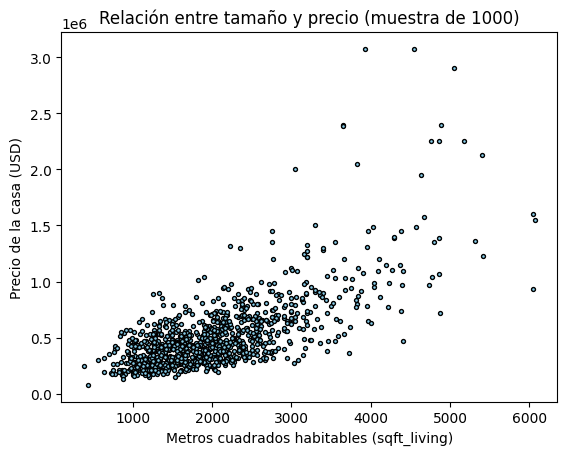

In [111]:
plotData(X, y)

In [112]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [113]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)


In [114]:
print(X)

[[1.00e+00 1.18e+03]
 [1.00e+00 2.57e+03]
 [1.00e+00 7.70e+02]
 ...
 [1.00e+00 1.02e+03]
 [1.00e+00 1.60e+03]
 [1.00e+00 1.02e+03]]


<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [115]:
def calcularCosto(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [116]:
theta0 = np.zeros(X_b.shape[1])  # vector de parámetros iniciales
print("Costo inicial J(θ=0):", calcularCosto(X_b, y, theta0))


Costo inicial J(θ=0): 213235671551.19766


Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [117]:
J = calcularCosto(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)


# pruebas adicionales de la función de costes
J = calcularCosto(X, y, theta=np.array([0.5, 0.5]))
print('Con theta = [0.5, 0.5]\n Costo calculado = %.2f' % J)


J = calcularCosto(X, y, theta=np.array([0.6, 0.6]))
print('Con theta = [0.6, 0.6]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.7, 0.7]))
print('Con theta = [0.7, 0.7]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.8, 0.8]))
print('Con theta = [0.8, 0.8]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.75, 0.75]))
print('Con theta = [0.75, 0.75]\n Costo calculado = %.2f' % J)

Con theta = [0, 0] 
 Costo calculado = 213235671551.20
Con theta = [0.5, 0.5]
 Costo calculado = 212556031380.69
Con theta = [0.6, 0.6]
 Costo calculado = 212420258555.73
Con theta = [0.7, 0.7]
 Costo calculado = 212284537467.17
Con theta = [0.8, 0.8]
 Costo calculado = 212148868114.98
Con theta = [0.75, 0.75]
 Costo calculado = 212216696324.03


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [118]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        grad = (X.T @ (X @ theta - y)) / m      # ✔️ gradiente correcto
        theta = theta - alpha * grad

        # save the cost J in every iteration
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [119]:
# Asegurar que y sea columna
y = y.reshape(-1, 1)

# Inicializa los parametros de ajuste
theta = np.zeros((2, 1))

# Configuraciones para el descenso por el gradiente
iterations = 200000   # muchas iteraciones
alpha = 1e-8          # tasa pequeña porque no normalizamos

# Ejecuta gradiente descendente
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# Resultados
print("Theta encontrada por descenso gradiente:", theta.ravel())
print("Costo inicial: {:.2f}".format(J_history[0]))
print("Costo final: {:.2f}".format(J_history[-1]))
print("Últimos 5 costos:", [float(v) for v in J_history[-5:]])


Theta encontrada por descenso gradiente: [-14.11384794 263.09486748]
Costo inicial: 195216850108.30
Costo final: 34330494269.76
Últimos 5 costos: [34330494271.77812, 34330494271.27279, 34330494270.767452, 34330494270.26211, 34330494269.756783]


Se utilizan los parametros finales para grafical la linea.

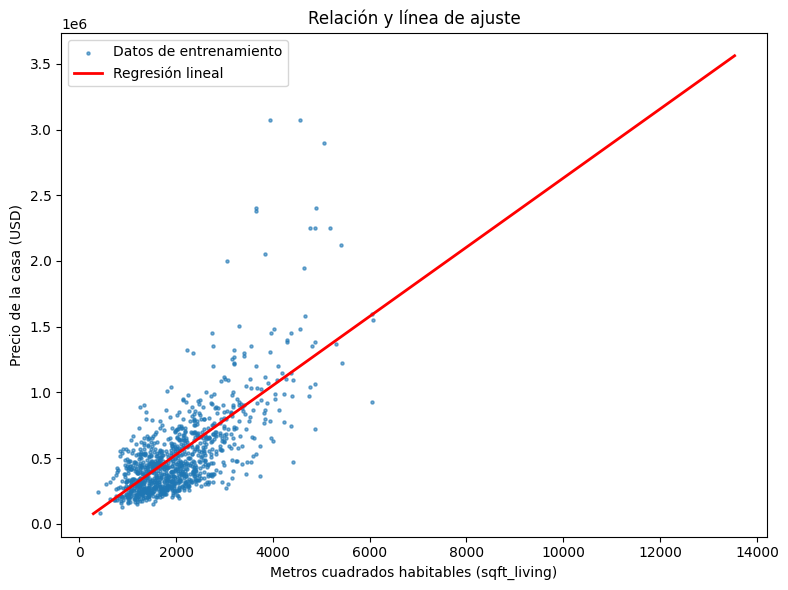

In [123]:

def plotData(ax, x, y):
    # NO crear figure ni hacer show aquí
    idx = np.arange(min(1000, len(x)))     # o tu muestreo aleatorio
    ax.scatter(x[idx], y[idx], s=5, alpha=0.6, label='Datos de entrenamiento')

# --- si entrenaste con x normalizado, prepara mu/sigma y usa x_raw para el eje ---
# x_raw = df['sqft_living'].to_numpy(dtype=float).reshape(-1,1)
# mu, sigma ya calculados si normalizaste
# X = np.c_[np.ones((m,1)), (x_raw - mu)/sigma]  # por ejemplo

fig, ax = pyplot.subplots(figsize=(8,6))

# 1) puntos
plotData(ax, X[:,1], y)   # si X[:,1] está normalizado, usa x_raw aquí para el eje visual

# 2) línea ordenada (¡muy importante ordenar!)
x_line = X[:,1].ravel()
y_hat  = (X @ theta).ravel()
order  = np.argsort(x_line)
ax.plot(x_line[order], y_hat[order], 'r-', linewidth=2, label='Regresión lineal')

ax.set_xlabel('Metros cuadrados habitables (sqft_living)')
ax.set_ylabel('Precio de la casa (USD)')
ax.set_title('Relación y línea de ajuste')
ax.legend()
fig.tight_layout()
pyplot.show()


Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [127]:
# Predecir el precio de una casa con 1000 sqft
predict1 = np.dot([1, 1000], theta).item()
print('Para una casa de 1000 sqft, se predice un precio de {:.2f} USD\n'.format(predict1))

# Predecir el precio de una casa con 2000 sqft
predict2 = np.dot([1, 2000], theta).item()
print('Para una casa de 2000 sqft, se predice un precio de {:.2f} USD\n'.format(predict2))



Para una casa de 1000 sqft, se predice un precio de 263080.75 USD

Para una casa de 2000 sqft, se predice un precio de 526175.62 USD



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

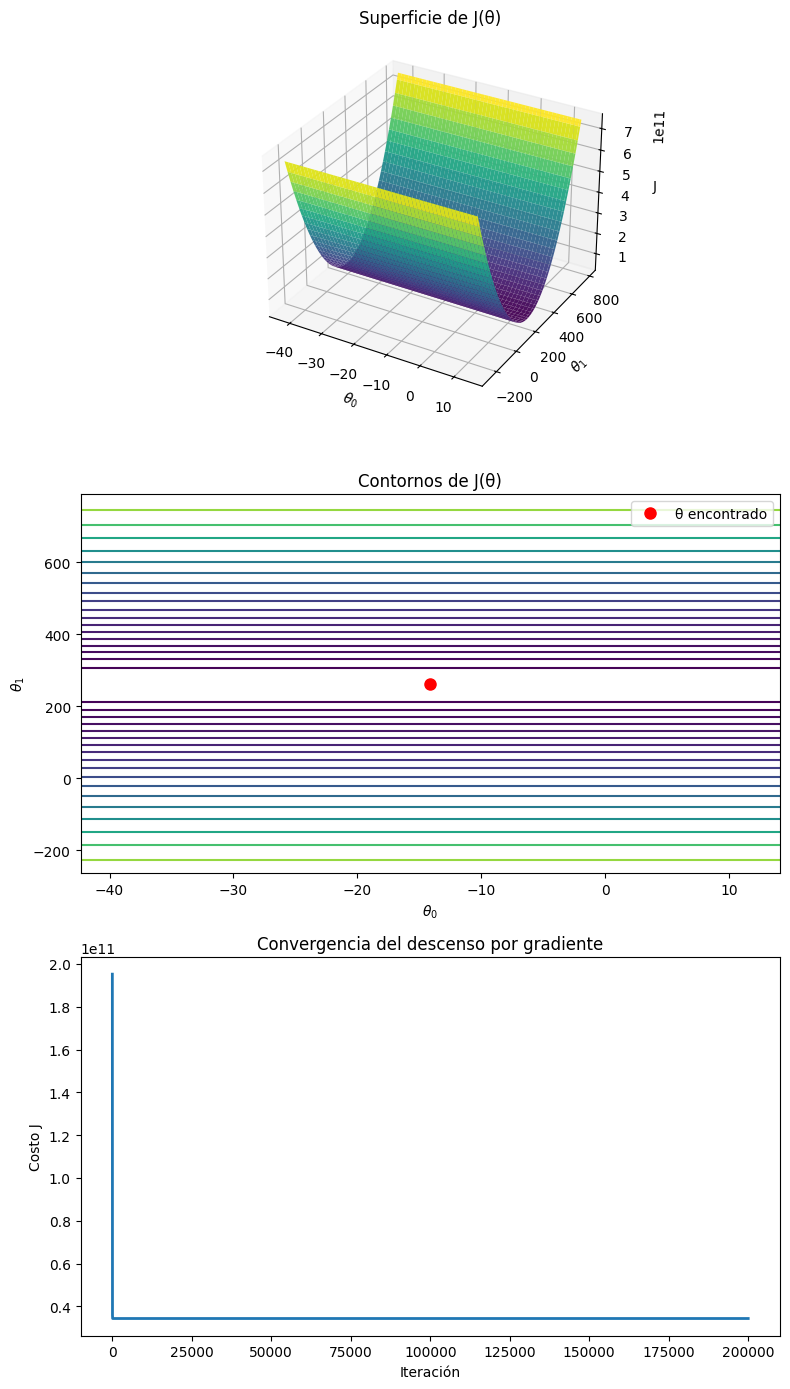

In [129]:


# --- (opcional) usar una muestra para que no sea pesado ---
muestra = np.random.choice(X.shape[0], size=min(2000, X.shape[0]), replace=False)
X_plot = X[muestra]
y_plot = y[muestra]

# --- rangos alrededor de tu theta final (mejor que valores fijos del ex1) ---
# extrae escalares seguros desde theta (evita DeprecationWarning)
t = theta.ravel()                 # -> [theta0, theta1]
t0_c, t1_c = float(t[0]), float(t[1])   # intercepto y pendiente

theta0_vals = np.linspace(t0_c - 2*abs(t0_c if t0_c != 0 else 1),
                          t0_c + 2*abs(t0_c if t0_c != 0 else 1), 100)
theta1_vals = np.linspace(t1_c - 2*abs(t1_c if t1_c != 0 else 1),
                          t1_c + 2*abs(t1_c if t1_c != 0 else 1), 100)
# mallas 2D
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# calcular J en la cuadrícula
J_vals = np.zeros_like(T0)
for i in range(T0.shape[0]):        # sobre theta1
    for j in range(T0.shape[1]):    # sobre theta0
        th = np.array([[T0[i, j]],  # (2,1)  << IMPORTANTE
                       [T1[i, j]]])
        J_vals[i, j] = calcularCosto(X_plot, y_plot, th)

# --- figura con 3 subplots ---
fig = pyplot.figure(figsize=(8, 14))

# Superficie 3D
ax = fig.add_subplot(3, 1, 1, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', linewidth=0, antialiased=True, alpha=0.95)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('J')
ax.set_title('Superficie de J(θ)')

# Contornos (mínimo)
ax2 = fig.add_subplot(3, 1, 2)
CS = ax2.contour(
    T0, T1, J_vals,
    levels=np.logspace(np.log10(J_vals.min() + 1e-9),
                       np.log10(J_vals.max()), 20),
    cmap='viridis', linewidths=1.5
)

# extraer escalares seguros de theta
t = theta.ravel()   # convierte a vector plano
ax2.plot(float(t[0]), float(t[1]), 'ro', ms=8, label='θ encontrado')

ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_title('Contornos de J(θ)')
ax2.legend()


# Convergencia del costo (tu historial real)
ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(np.arange(len(J_history)), J_history, lw=2)
ax3.set_xlabel('Iteración')
ax3.set_ylabel('Costo J')
ax3.set_title('Convergencia del descenso por gradiente')

fig.tight_layout()
pyplot.show()
